# LAB 2 Boosting Machine Learning Algorithm

## Introduction
Reference: Danish Harron: "Python Machine Learning Case Studies" Chapter 5. 2017.

This workshop reviews making using the classification methods developed in the application of data minning so as to spot out the insight froma. complicated data set for further A/B Test applications.

The case here about a pediatric surgeon and clinic supervisor at Ohio Clinic, was in big trouble, facing clinic losses for the third consecutive year. 

The supervisor had recently been promoted to this position, but she knew for a fact that the clinic had been doing due diligence in terms of efficiency. What surprised her most was that the hospital was incurring losses despite having the finest doctors available and no lack of scheduled appointments. 

She got the data log file and discovered reasons that losses are coming up even though the rate of appointments is going up. However, patients are not reporting at the time of their scheduled appointments, prompt not to meet following patients leading to many overtime work of staff, raising the costs. 

She believed that knowing which patients were likely not to show up would enable the hospital to take countermeasures to minimize the overtime work costs.

### Python libraries:¶

numpy, time for common language program function

pandas for data file or database manilpulation

IPython for data visulation

statistics, sklearn, and scipy are for statistical and mathematical formula/function

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.pylab import rcParams
import pandas_profiling as pdf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import kernel_approximation
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.kernel_approximation import (RBFSampler,Nystroem)
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

rcParams['figure.figsize'] = 15, 5

In [2]:
data = pd.read_csv('No-show-Issue-Comma-300k.csv')
data.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


In [3]:
data.shape

(300000, 15)

In [4]:
for column in list(data.columns):
    print("{0:25} {1:}".format(column, data[column].nunique()))

Age                       109
Gender                    2
AppointmentRegistration   295425
ApointmentData            534
DayOfTheWeek              7
Status                    2
Diabetes                  2
Alcoolism                 2
HiperTension              2
Handcap                   5
Smokes                    2
Scholarship               2
Tuberculosis              2
Sms_Reminder              3
AwaitingTime              213


### Data Wrangling 

In [5]:
data[data['Age'] < 0]['Age'].value_counts().sum()

6

In [6]:
data = data[data['Age'] >= 0]

In [7]:
del data['Handcap']

In [8]:
data['AwaitingTime'] = data['AwaitingTime'].apply(lambda x: abs(x))
dow_mapping = {'Monday' : 0, 'Tuesday' : 1, 'Wednesday' : 2, 'Thursday' : 3, 'Friday' : 4, 'Saturday' : 5, 'Sunday' : 6}
data['DayOfTheWeek'] = data['DayOfTheWeek'].map(dow_mapping)

In [9]:
data['Alcoholism'] = data['Alcoolism']
del data['Alcoolism']
data['HyperTension'] = data['HiperTension']
del data['HiperTension']
data['AppointmentDate'] = data['ApointmentData']
del data['ApointmentData']

In [10]:
for field in ['Gender', 'Status']:
    data[field] = pd.Categorical(data[field]).codes

In [11]:
data.head()

,Age,Gender,AppointmentRegistration,DayOfTheWeek,Status,Diabetes,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,Alcoholism,HyperTension,AppointmentDate
0,19,1,2014-12-16T14:46:25Z,2,1,0,0,0,0,0,29,0,0,2015-01-14T00:00:00Z
1,24,0,2015-08-18T07:01:26Z,2,1,0,0,0,0,0,1,0,0,2015-08-19T00:00:00Z
2,4,0,2014-02-17T12:53:46Z,1,1,0,0,0,0,0,1,0,0,2014-02-18T00:00:00Z
3,5,1,2014-07-23T17:02:11Z,3,1,0,0,0,0,1,15,0,0,2014-08-07T00:00:00Z
4,38,1,2015-10-21T15:20:09Z,1,1,0,0,0,0,1,6,0,0,2015-10-27T00:00:00Z


In [12]:
def features_plots(discrete_vars):

    plt.figure(figsize=(15,24.5))

    for i, cv in enumerate(['Age']):
        plt.subplot(7, 2, i+1)
        plt.hist(data[cv], bins=len(data[cv].unique()))
        plt.title(cv)
        plt.ylabel('Frequency')

    for i, dv in enumerate(discrete_vars):
        plt.subplot(7, 2, i+3)
        data[dv].value_counts().plot(kind='bar', title=dv)
        plt.ylabel('Frequency')

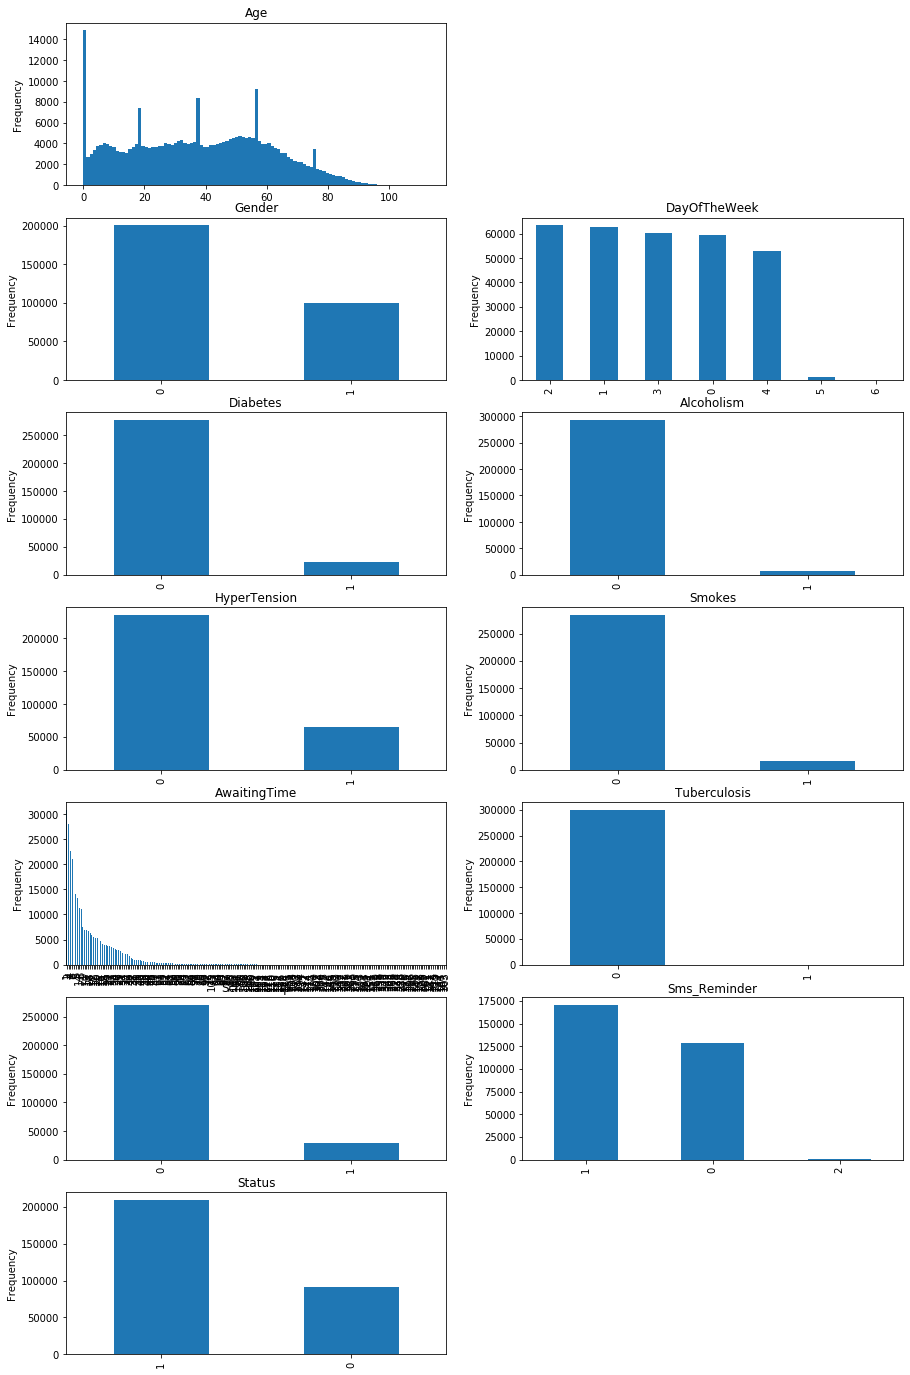

In [13]:
discrete_vars = ['Gender', 'DayOfTheWeek','Diabetes', 'Alcoholism', 'HyperTension', 'Smokes', 'AwaitingTime',
                      'Tuberculosis', 'Scholarship', 'Sms_Reminder', 'Status']

features_plots(discrete_vars)

(-1, 2)

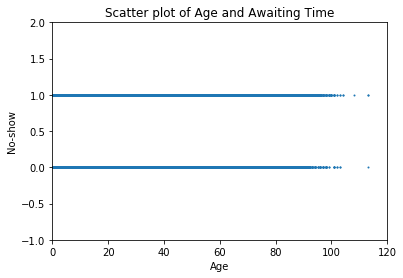

In [14]:
plt.scatter(data['Age'], data['Status'], s=1)
plt.title('Scatter plot of Age and Awaiting Time')
plt.xlabel('Age')
plt.ylabel('No-show')
plt.xlim(0, 120)
plt.ylim(-1, 2)

In [15]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = data[['Age', 'AwaitingTime']].corr(method='pearson')
print(correlations)

                Age  AwaitingTime
Age           1.000        -0.004
AwaitingTime -0.004         1.000


Text(0, 0.5, 'Frequency')

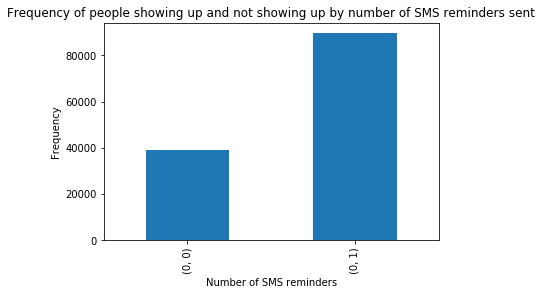

In [16]:
data_dow_status = data.groupby(['Sms_Reminder', 'Status'])['Sms_Reminder'].count().fillna(0)
data_dow_status[[0, 1]].plot(kind='bar', stacked=True)
plt.title('Frequency of people showing up and not showing up by number of SMS reminders sent')
plt.xlabel('Number of SMS reminders')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

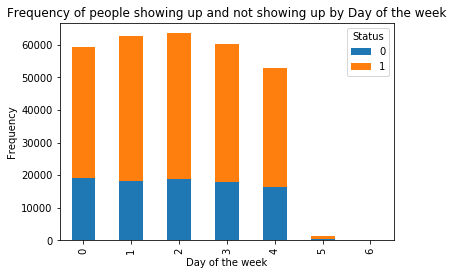

In [17]:
data_dow_status = data.groupby(['DayOfTheWeek', 'Status'])['DayOfTheWeek'].count().unstack('Status').fillna(0)
data_dow_status[[0, 1]].plot(kind='bar', stacked=True)
plt.title('Frequency of people showing up and not showing up by Day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Frequency')

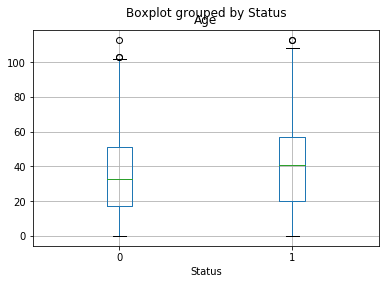

In [18]:
data.boxplot(column=['Age'], return_type='axes', by='Status')
plt.show()

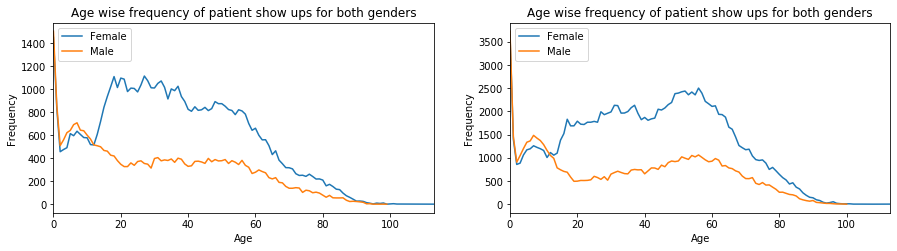

In [19]:
plt.figure(figsize=(15,3.5))

for i, status in enumerate(['show ups', 'show ups']):

    data_show = data[data['Status']==i]
    plt.subplot(1, 2, i+1)

    for gender in [0, 1]:
        data_gender = data_show[data_show['Gender']==gender]
        freq_age = data_gender['Age'].value_counts().sort_index()
        freq_age.plot()

    plt.title('Age wise frequency of patient %s for both genders'%status)
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.legend(['Female', 'Male'], loc='upper left')

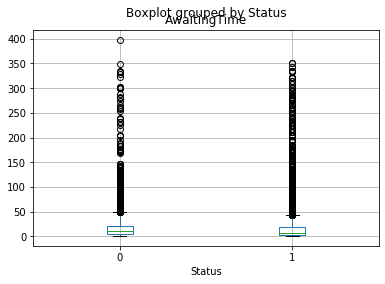

In [20]:
data.boxplot(column=['AwaitingTime'], return_type='axes', by='Status')
plt.show()

#### Exercise: Extract more features from the date features (hour, min, etc.).

In [21]:
for col in ['AppointmentRegistration', 'AppointmentDate']: #'AppointmentRegistration', 'ApointmentData'
    for index, component in enumerate(['year', 'month', 'day']):
        data['%s_%s'%(col, component)] = data[col].apply(lambda x: int(x.split('T')[0].split('-')[index]))

In [22]:
for index, component in enumerate(['hour']):
    data['%s_%s'%('AppointmentRegistration', component)] = data['AppointmentRegistration'].apply(lambda x: int(x.split('T')[1][:-1].split(':')[index]))

In [23]:
# Include a Boolean transformation of the features in your dataset like that done in Chapter 4. 
# This will increase the feature set which can become beneficial while training the model.
data.head()

,Age,Gender,AppointmentRegistration,DayOfTheWeek,Status,Diabetes,Smokes,Scholarship,Tuberculosis,Sms_Reminder,...,Alcoholism,HyperTension,AppointmentDate,AppointmentRegistration_year,AppointmentRegistration_month,AppointmentRegistration_day,AppointmentDate_year,AppointmentDate_month,AppointmentDate_day,AppointmentRegistration_hour
0,19,1,2014-12-16T14:46:25Z,2,1,0,0,0,0,0,...,0,0,2015-01-14T00:00:00Z,2014,12,16,2015,1,14,14
1,24,0,2015-08-18T07:01:26Z,2,1,0,0,0,0,0,...,0,0,2015-08-19T00:00:00Z,2015,8,18,2015,8,19,7
2,4,0,2014-02-17T12:53:46Z,1,1,0,0,0,0,0,...,0,0,2014-02-18T00:00:00Z,2014,2,17,2014,2,18,12
3,5,1,2014-07-23T17:02:11Z,3,1,0,0,0,0,1,...,0,0,2014-08-07T00:00:00Z,2014,7,23,2014,8,7,17
4,38,1,2015-10-21T15:20:09Z,1,1,0,0,0,0,1,...,0,0,2015-10-27T00:00:00Z,2015,10,21,2015,10,27,15


In [24]:
pdf.ProfileReport(data)

/Users/victorius/opt/anaconda3/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,22
Number of observations,299994
Total Missing (%),0.0%
Total size in memory,46.3 MiB
Average record size in memory,162.0 B
Numeric,11
Categorical,2
Boolean,8
Date,0
Text (Unique),0
Rejected,1


In [25]:
print(data.shape, data.head())

(299994, 21)    Age  Gender AppointmentRegistration  DayOfTheWeek  Status  Diabetes  Smokes  Scholarship  \
0   19       1    2014-12-16T14:46:25Z             2       1         0       0            0   
1   24       0    2015-08-18T07:01:26Z             2       1         0       0            0   
2    4       0    2014-02-17T12:53:46Z             1       1         0       0            0   
3    5       1    2014-07-23T17:02:11Z             3       1         0       0            0   
4   38       1    2015-10-21T15:20:09Z             1       1         0       0            0   

   Tuberculosis  Sms_Reminder  ...  Alcoholism  HyperTension       AppointmentDate  \
0             0             0  ...           0             0  2015-01-14T00:00:00Z   
1             0             0  ...           0             0  2015-08-19T00:00:00Z   
2             0             0  ...           0             0  2014-02-18T00:00:00Z   
3             0             1  ...           0             0  2014-08-07

In [26]:
def model_performance(model_name, X_train, y_train, y_test, Y_pred):

    print('Model name: %s'%model_name)
    print('Test accuracy (Accuracy Score): %f'%metrics.accuracy_score(y_test, Y_pred))
    print('Test accuracy (ROC AUC Score): %f'%metrics.roc_auc_score(y_test, Y_pred))
    print('Train accuracy: %f'%clf.score(X_train, y_train))

    fpr, tpr, thresholds = metrics.precision_recall_curve(y_test, Y_pred)
    print('Area Under the Precision-Recall Curve: %f'%metrics.auc(fpr, tpr))
    
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, Y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [27]:
features_of_choice = ['Age', 'Gender', 'Diabetes', 'Alcoholism', 'HyperTension',
                        'Scholarship', 'Sms_Reminder', 
                        'AppointmentDate_year', 'AppointmentDate_month', 'AppointmentDate_day',
                     ]


x = np.array(data[features_of_choice])
y = np.array(data['Status'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [28]:
print(data.columns)

Index(['Age', 'Gender', 'AppointmentRegistration', 'DayOfTheWeek', 'Status', 'Diabetes', 'Smokes',
       'Scholarship', 'Tuberculosis', 'Sms_Reminder', 'AwaitingTime', 'Alcoholism', 'HyperTension',
       'AppointmentDate', 'AppointmentRegistration_year', 'AppointmentRegistration_month',
       'AppointmentRegistration_day', 'AppointmentDate_year', 'AppointmentDate_month',
       'AppointmentDate_day', 'AppointmentRegistration_hour'],
      dtype='object')


In [29]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Model name: Decision tree classifier
Test accuracy (Accuracy Score): 0.573029
Test accuracy (ROC AUC Score): 0.515423
Train accuracy: 0.881426
Area Under the Precision-Recall Curve: 0.105850


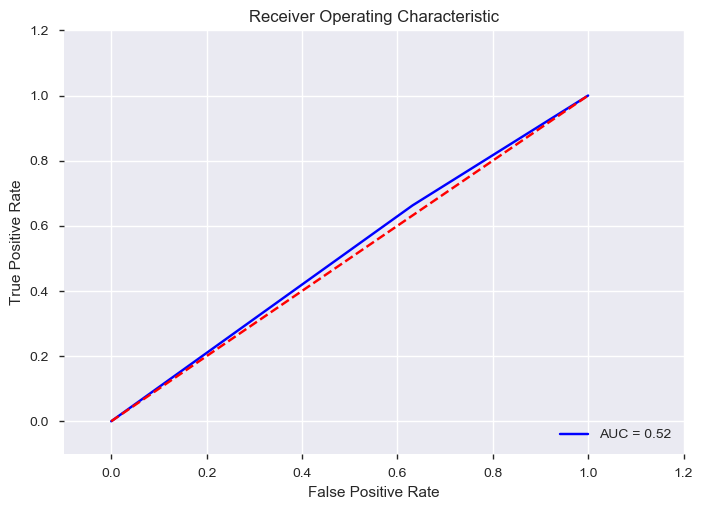

In [30]:
y_pred = clf.predict(x_test)
model_performance('Decision tree classifier', x_train, y_train, y_test, y_pred)

In [31]:
rbf_feature = kernel_approximation.RBFSampler(gamma=1, random_state=1)
X_train = rbf_feature.fit_transform(x_train)

clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Model name: Kernel approximation
Test accuracy (Accuracy Score): 0.695619
Test accuracy (ROC AUC Score): 0.500000
Train accuracy: 0.698398
Area Under the Precision-Recall Curve: 0.152191


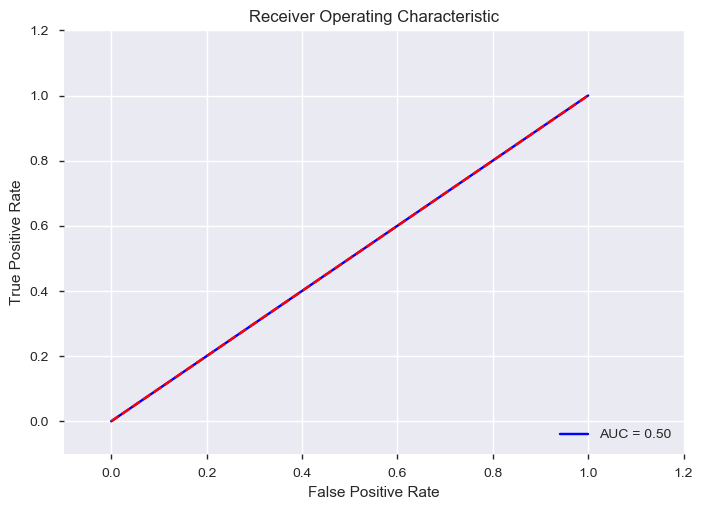

In [32]:
X_test = rbf_feature.fit_transform(x_test)
Y_pred = clf.predict(X_test)
model_performance('Kernel approximation', X_train, y_train, y_test, Y_pred)


In [33]:
clf = GradientBoostingClassifier(random_state=10, learning_rate=0.1,
    n_estimators=200, max_depth=5, max_features=10)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Model name: Gradient Boosting
Test accuracy (Accuracy Score): 0.699452
Test accuracy (ROC AUC Score): 0.509900
Train accuracy: 0.703712
Area Under the Precision-Recall Curve: 0.153458


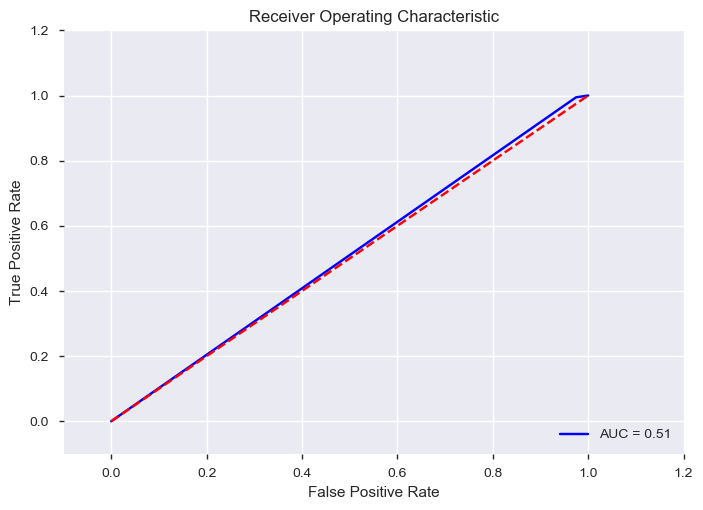

In [34]:
model_performance('Gradient Boosting', x_train, y_train, y_test, y_pred)

In [35]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

/Users/victorius/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Model name: Random Forest
Test accuracy (Accuracy Score): 0.614596
Test accuracy (ROC AUC Score): 0.519226
Train accuracy: 0.871716
Area Under the Precision-Recall Curve: 0.121538


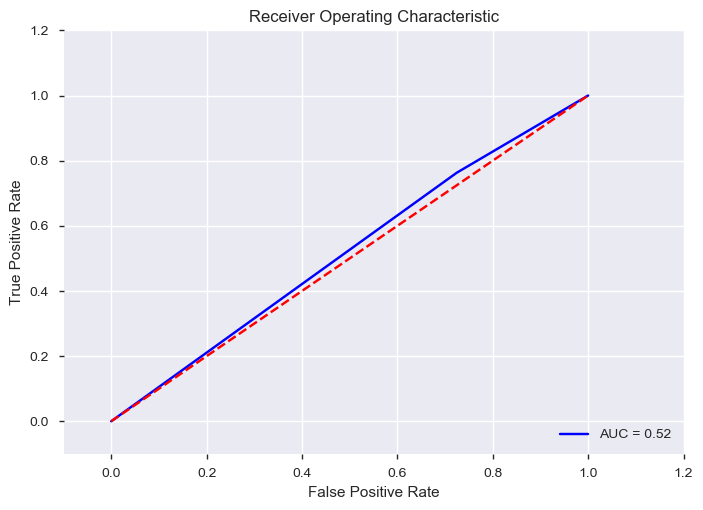

In [36]:
y_pred = clf.predict(x_test)
model_performance('Random Forest', x_train, y_train, y_test, y_pred)

In [37]:
for feature, score in zip(features_of_choice, list(clf.feature_importances_)):
        print('%s\t%f'%(feature, score))

Age	0.402539
Gender	0.016386
Diabetes	0.005908
Alcoholism	0.003481
HyperTension	0.012087
Scholarship	0.003018
Sms_Reminder	0.022319
AppointmentDate_year	0.020876
AppointmentDate_month	0.172313
AppointmentDate_day	0.341073


Model name: Gradient Boosting
Test accuracy (Accuracy Score): 0.614596
Test accuracy (ROC AUC Score): 0.519226
Train accuracy: 0.871716
Area Under the Precision-Recall Curve: 0.121538


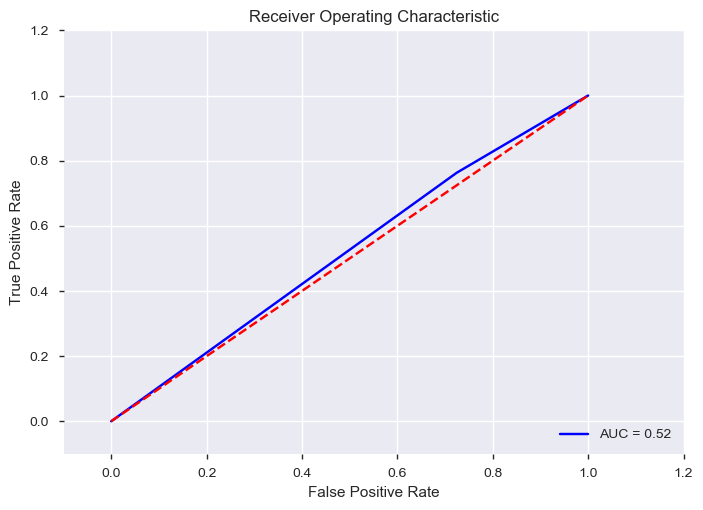

In [38]:
#Excercise 1: Repeat gradient boosting classification but this time only consider the features it deemed important. Did AUC and ROC improve?
features_of_choice2 = ['Age', 'Gender', 'Sms_Reminder', 
                        'AppointmentDate_month', 'AppointmentDate_day',]

x2 = np.array(data[features_of_choice2])
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.3, random_state=1)

clf2 = GradientBoostingClassifier(random_state=10, learning_rate=0.1,
    n_estimators=200, max_depth=5, max_features=10)
clf2.fit(x_train2, y_train2)
y_pred2 = clf.predict(x_test2)
model_performance('Gradient Boosting', x_train2, y_train2, y_test2, y_pred2)


In [39]:
for feature, score in zip(features_of_choice, list(clf2.feature_importances_)):
        print('%s\t%f'%(feature, score))

Age	0.478423
Gender	0.015380
Diabetes	0.006713
Alcoholism	0.030134
HyperTension	0.009560
Scholarship	0.022785
Sms_Reminder	0.025495
AppointmentDate_year	0.092636
AppointmentDate_month	0.169637
AppointmentDate_day	0.149237


[1. 1. 1. ... 1. 1. 1.]
Model name: XGBoost
Test accuracy (Accuracy Score): 0.695874
Test accuracy (ROC AUC Score): 0.500574
Train accuracy: 0.871716
Area Under the Precision-Recall Curve: 0.152276


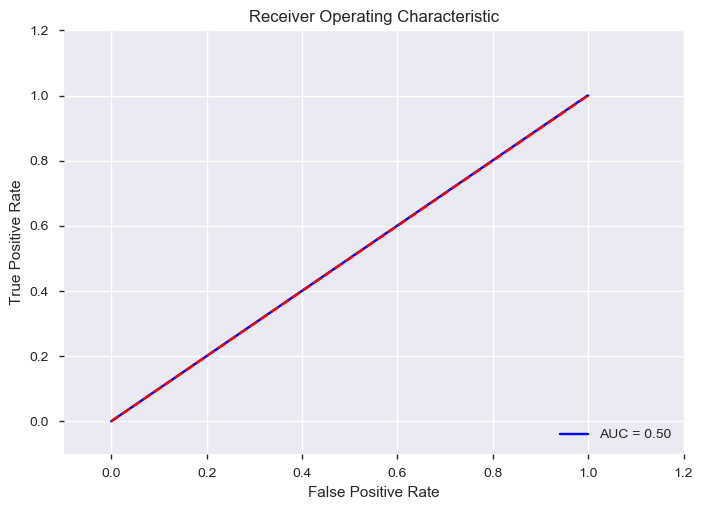

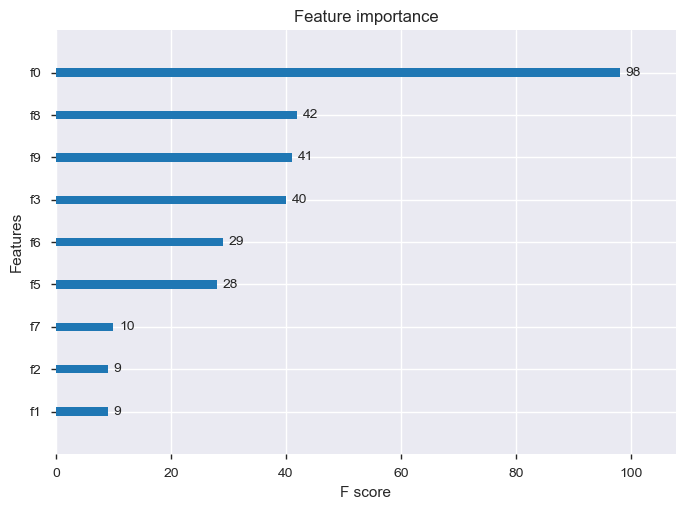

In [40]:
#Excercise 2: Recently a new type of boosting, Xgboost, has been popular among data scientists. Apply that to our dataset, optimize using grid search, and see if it performs relatively better than gradient boosting.
import xgboost as xgb

params = {'max_depth':5, 'eta':0.1, 'silent':1, 'objective':'binary:hinge' }
num_round = 10
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
bst = xgb.train(params, dtrain, num_round)
y_pred4 = bst.predict(dtest)

print(y_pred4)

model_performance('XGBoost', x_train, y_train, y_test, y_pred4)
xgb.plot_importance(bst)

In [ ]:
#Excercise 3: Apply grid search to gradient boosting to fine-tune the parameters of learning rate, max_depth, etc.
from sklearn.model_selection import GridSearchCV

clf3 = GradientBoostingClassifier()
params = {"learning_rate": [0.001, 0.1, 0.5], "max_depth":[3,5,7,10], "n_estimators":[100,200]}
cv = GridSearchCV(estimator=clf3, param_grid=params)

y_pred3 = cv.fit(x_train, y_train).predict(x_test)

model_performance('Gradient Boosting', x_train, y_train, y_test, y_pred3)


/Users/victorius/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
print(cv.best_params_)

THE END